In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train.csv', 'sample_submission.csv']


In [2]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
sns.set()
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
%%time
train = pd.read_csv('../input/train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

CPU times: user 2min 19s, sys: 12.5 s, total: 2min 31s
Wall time: 2min 30s


In [4]:
#The Amplitude Spectral Density ASDs are the square root of the power spectral densities (PSDs), 
#which are averages of the square of the fast fourier transforms (FFTs) of the data.

from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
#rows = 150_000
rows = 1_500_000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(0,5000)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<1'] = sum(x.between(0, 1))
    #X_train.loc[segment, '1<x<2'] = sum(x.between(1, 2))
    #X_train.loc[segment, '2<x<3'] = sum(x.between(2, 3))
    #X_train.loc[segment, '3<x<4'] = sum(x.between(3, 4))
    #X_train.loc[segment, '4<x<5'] = sum(x.between(4, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<40'] = sum(x.between(30, 40))
    #X_train.loc[segment, '40<x<50'] = sum(x.between(40, 50))
   # X_train.loc[segment, '50<x<60'] = sum(x.between(50, 60))
    #X_train.loc[segment, '60<x<70'] = sum(x.between(60, 70))
    #X_train.loc[segment, '70<x<80'] = sum(x.between(70, 80))
   # X_train.loc[segment, '80<x<90'] = sum(x.between(80, 90))
   # X_train.loc[segment, '90<x<100'] = sum(x.between(90, 100))
   # X_train.loc[segment, '100<x<200'] = sum(x.between(100, 200))
    
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)

100%|██████████| 419/419 [06:18<00:00,  1.14it/s]


In [5]:
X = X_train
Y= y_train

In [6]:
#https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=100, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train= X_scaled[:219]
X_test = X_scaled[-200:]
y_train = Y[:219]
y_test = Y[-200:]

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import scipy.stats as st

grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train, y_train.values.ravel())
gs1.best_params_    
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

{'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

mean_absolute_error_sqrtTime: 0.3839544066882038
r2_score_sqrtTime: 0.6588966733412236


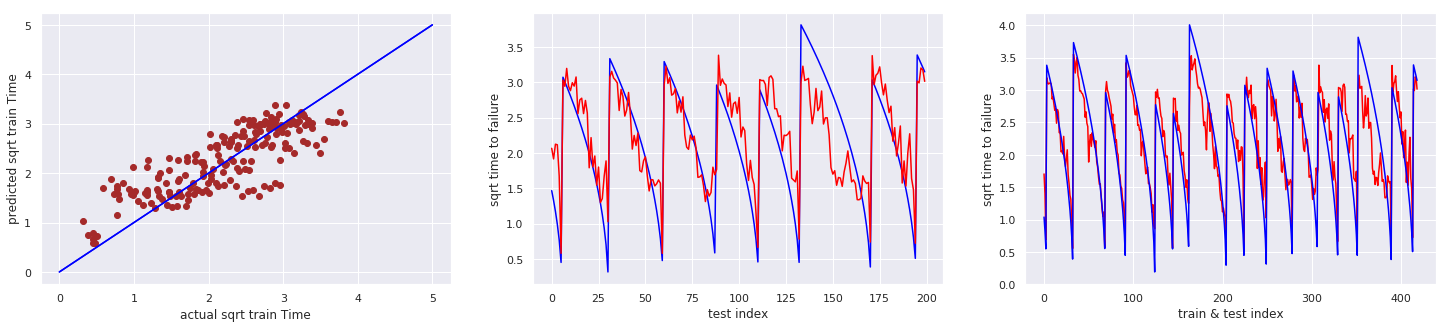

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions =  gs1.predict(X_test)
full_predictions = gs1.predict(X_scaled)

print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('test index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.6483157400238502
r2_score: 0.6292930059233011


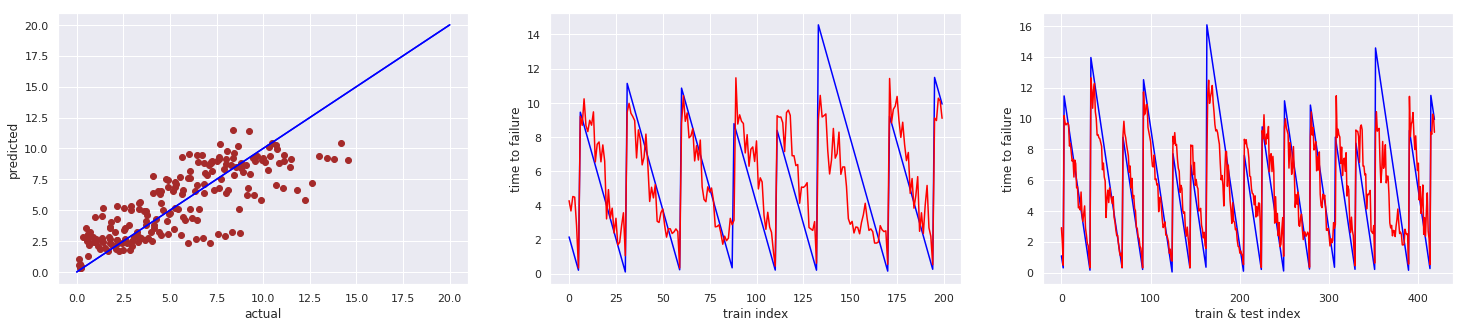

In [9]:

y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('train index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

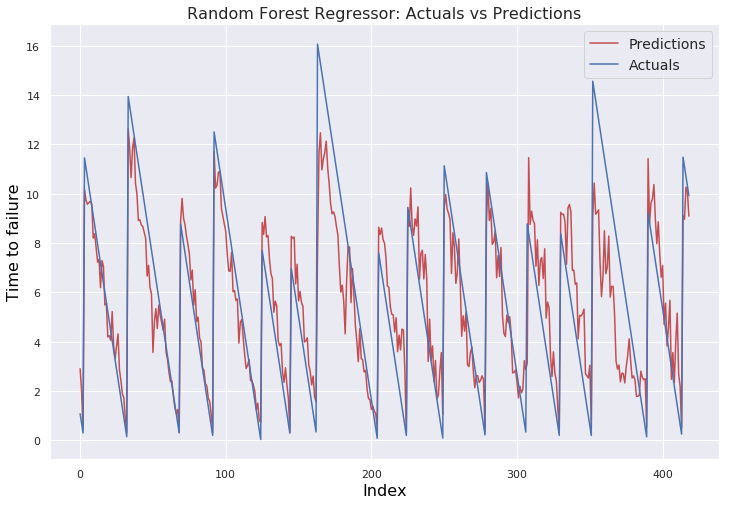

In [10]:
#plt.plot(y_nolog)
#plt.plot(y_nolog_predict)
#plt.title("Actuals vs Predictions")
fig = plt.subplots(figsize=(12, 8))
plt.title("Random Forest Regressor: Actuals vs Predictions",fontsize=16)
plt.plot(y_nolog_predict, color='r')
plt.ylabel('Time to failure', color='black',fontsize=16)
plt.plot(y_nolog, color='b')
plt.xlabel('Index', color='black',fontsize=16)
plt.legend(['Predictions','Actuals'], loc='upper right',fontsize=14)
plt.grid(True)

In [11]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge

grid = {
    #'max_depth': [4, 6, 8, 10, 12],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'min_samples_leaf': [2, 4, 12],
    #'min_samples_split': [4,8,12,16,20, 30, 40, 50, 60],
    "learning_rate": st.uniform(0.01, 0.4),
    'loss' : ["square"],
    #'n_estimators' : st.randint(10000, 20000)
}
#params = grid_search_cv(AdaBoostRegressor(),
                        #grid, X_train_scaled, target)
#rf_oof = make_predictions(AdaBoostRegressor(**params),
                          #X_train_scaled, target)
base = Ridge(alpha=1) 
rfr = AdaBoostRegressor(n_estimators = 500, base_estimator=base)
gs4 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs4.fit(X_train, y_train.values.ravel())  
gs4.best_params_      

{'learning_rate': 0.18356262878067706, 'loss': 'square'}

mean_absolute_error_sqrtTime: 0.40427446327698374
r2_score_sqrtTime: 0.6110087549191949


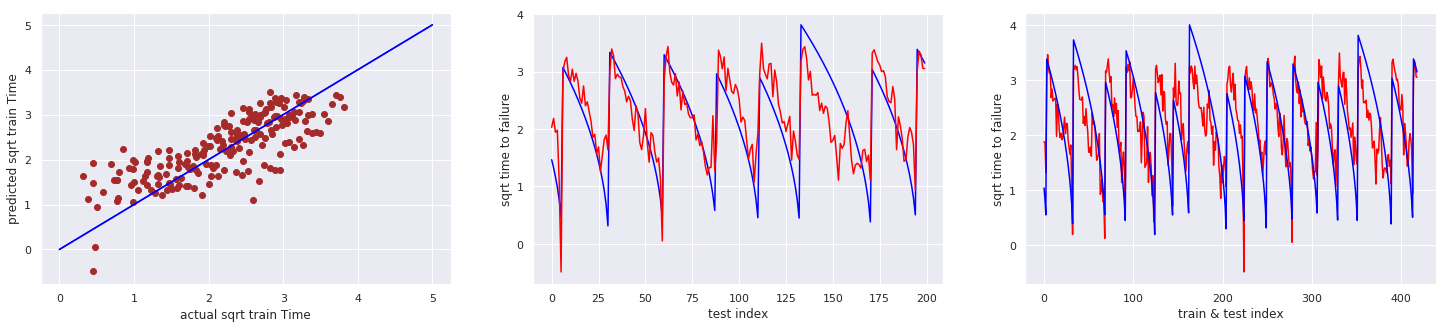

In [12]:
predictions =  gs4.predict(X_test)
full_predictions = gs4.predict(X_scaled)
print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('test index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.6969026718934614
r2_score: 0.6092712358509407


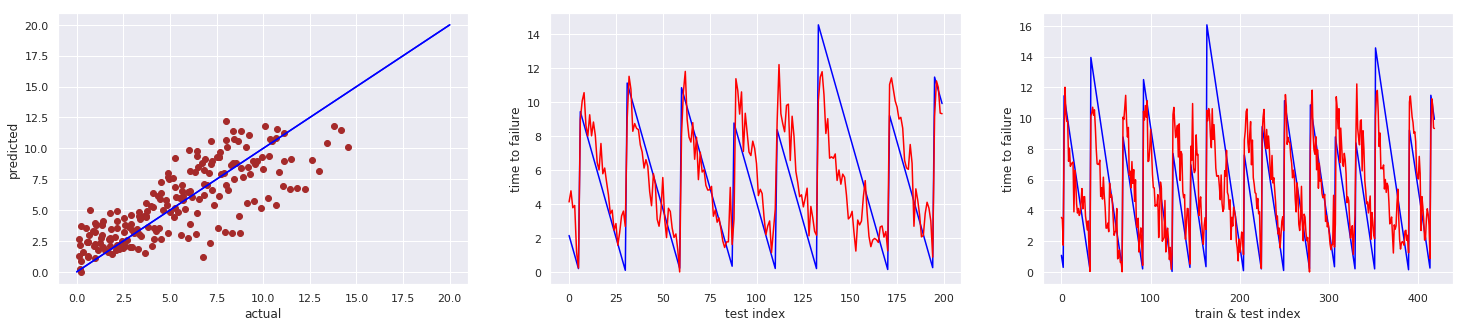

In [13]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('test index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

mean_absolute_error: 1.6969026718934614
r2_score: 0.6092712358509407


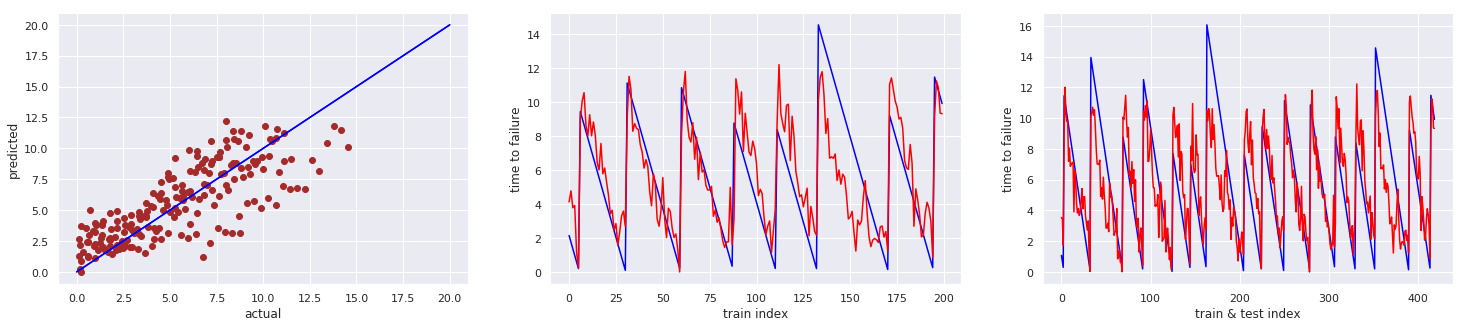

In [14]:
predictions[predictions>3.5]=3.5
y_predict = np.square(predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('train index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

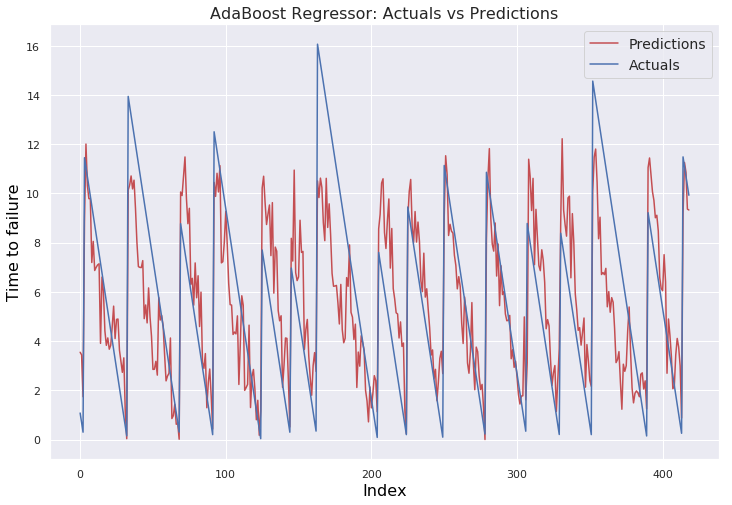

In [15]:
#plt.plot(y_nolog)
#plt.plot(y_nolog_predict)
#plt.title("Actuals vs Predictions")
fig = plt.subplots(figsize=(12, 8))
plt.title("AdaBoost Regressor: Actuals vs Predictions",fontsize=16)
plt.plot(y_nolog_predict, color='r')
plt.ylabel('Time to failure', color='black',fontsize=16)
plt.plot(y_nolog, color='b')
plt.xlabel('Index', color='black',fontsize=16)
plt.legend(['Predictions','Actuals'], loc='upper right',fontsize=14)
plt.grid(True)

## PCA

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,2.265510,-2.065809,-1.094303,0.096898,0.259800
1,3.214834,-1.303538,-0.188842,0.555813,-0.152444
2,12.784319,9.823885,-2.141249,-1.838066,0.833462
3,-4.837410,1.815356,0.917818,0.341705,-0.833855
4,-7.530376,1.836315,0.199685,-0.155455,0.556331


In [17]:
pca.explained_variance_ratio_

array([0.74538232, 0.18464205, 0.02035421, 0.0130543 , 0.00986942])

In [18]:
X_PCA_train_final = principalDf.values

In [19]:
X_PCA_train= X_PCA_train_final[:219]
X_PCA_test = X_PCA_train_final[-200:]
y_train = Y[:219]
y_test = Y[-200:]


print(X_PCA_train.shape)
print(X_PCA_test.shape)
print(y_train.shape)
print(y_test.shape)

(219, 5)
(200, 5)
(219, 1)
(200, 1)


In [20]:
grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    #'n_estimators' : st.randint(10000, 20000),
}
#params = grid_search_cv(RandomForestRegressor(criterion='mse', n_estimators=50),
                        #grid, X_train_scaled, target)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000)
gs7 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs7.fit(X_PCA_train, y_train.values.ravel())  
gs7.best_params_   
#rf_oof = make_predictions(RandomForestRegressor(**params),
                          #X_train_scaled, target)

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

mean_absolute_error_sqrtTime: 0.41487797344795624
r2_score_sqrtTime: 0.6098631339484721


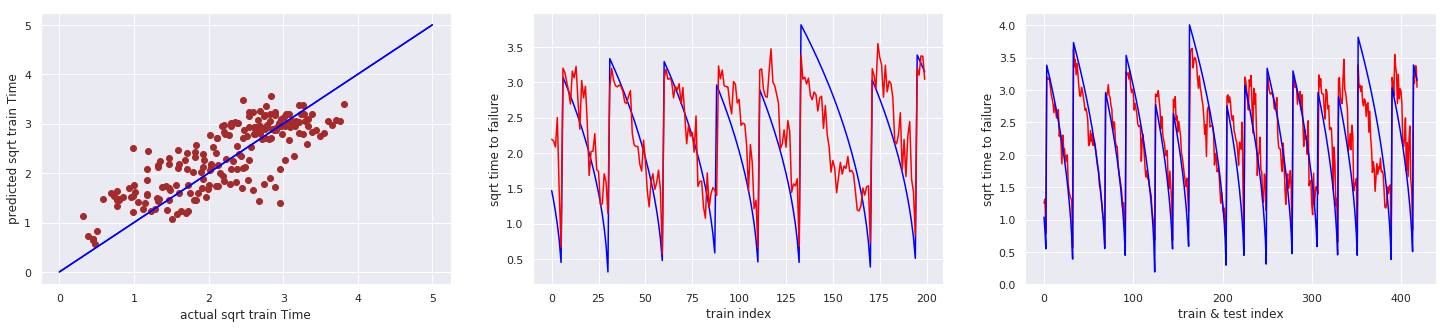

In [21]:
predictions =  gs7.predict(X_PCA_test)
full_predictions = gs7.predict(X_PCA_train_final)
print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('train index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.8066783785245242
r2_score: 0.5593706423724017


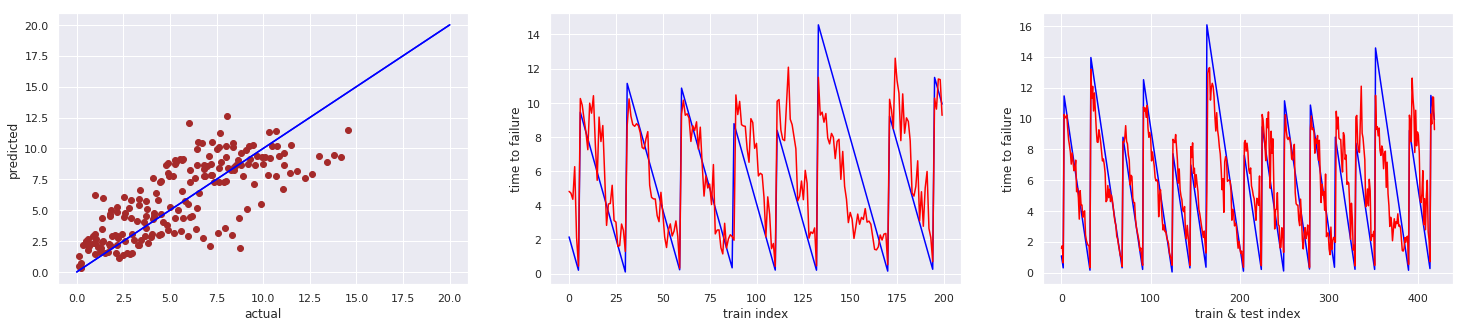

In [22]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('train index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

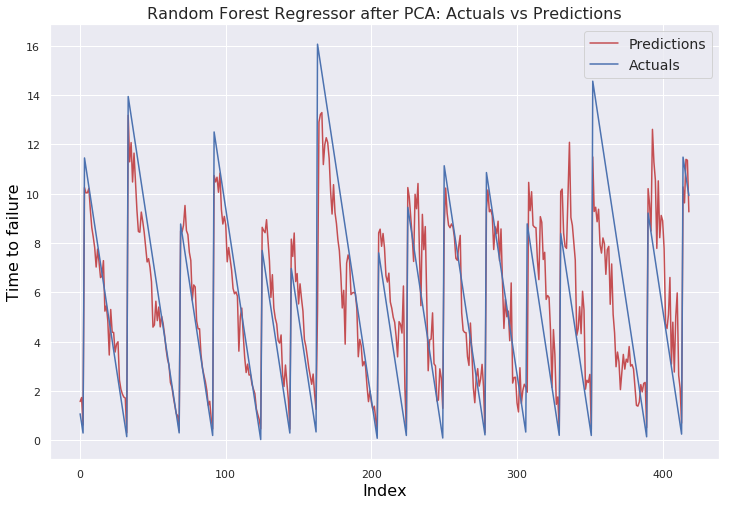

In [23]:
#plt.plot(y_nolog)
#plt.plot(y_nolog_predict)
#plt.title("Actuals vs Predictions")
fig = plt.subplots(figsize=(12, 8))
plt.title("Random Forest Regressor after PCA: Actuals vs Predictions",fontsize=16)
plt.plot(y_nolog_predict, color='r')
plt.ylabel('Time to failure', color='black',fontsize=16)
plt.plot(y_nolog, color='b')
plt.xlabel('Index', color='black',fontsize=16)
plt.legend(['Predictions','Actuals'], loc='upper right',fontsize=14)
plt.grid(True)

In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge

grid = {
    #'max_depth': [4, 6, 8, 10, 12],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'min_samples_leaf': [2, 4, 12],
    #'min_samples_split': [4,8,12,16,20, 30, 40, 50, 60],
    "learning_rate": st.uniform(0.01, 0.4),
    'loss' : ["square"],
    #'n_estimators' : st.randint(10000, 20000)
}
#params = grid_search_cv(AdaBoostRegressor(),
                        #grid, X_train_scaled, target)
#rf_oof = make_predictions(AdaBoostRegressor(**params),
                          #X_train_scaled, target)
base = Ridge(alpha=1) 
rfr = AdaBoostRegressor(n_estimators = 500, base_estimator=base)
gs10 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs10.fit(X_PCA_train, y_train.values.ravel())  
gs10.best_params_ 

{'learning_rate': 0.3303341744037791, 'loss': 'square'}

mean_absolute_error_sqrtTime: 0.4068369780740535
r2_score_sqrtTime: 0.6019997348138642


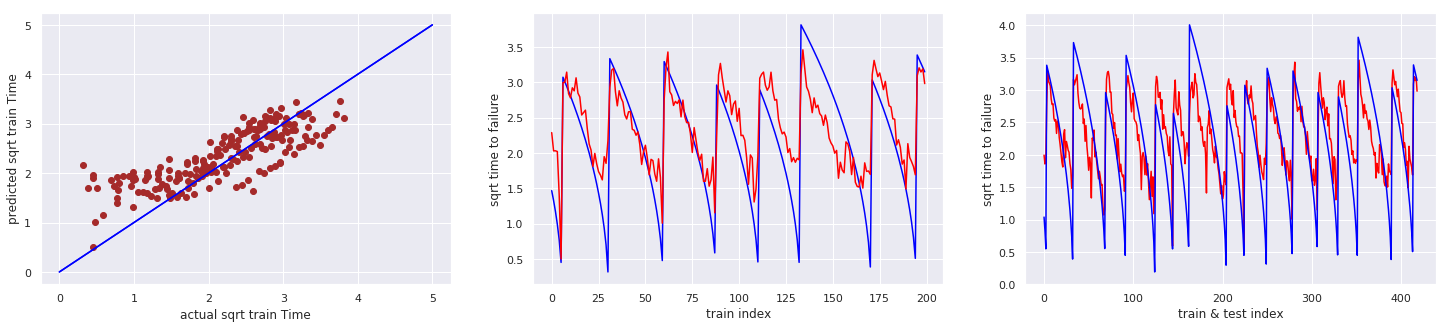

In [25]:
predictions =  gs10.predict(X_PCA_test)
full_predictions = gs10.predict(X_PCA_train_final)
print('mean_absolute_error_sqrtTime:', mean_absolute_error(y_test, predictions))
print('r2_score_sqrtTime:', r2_score(y_test, predictions))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual sqrt train Time')
ax1.set_ylabel('predicted sqrt train Time')
ax2.set_xlabel('train index')
ax2.set_ylabel('sqrt time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('sqrt time to failure')
ax1.scatter(y_test.values, predictions, color='brown')
ax1.plot([(0, 0), (5, 5)], [(0, 0), (5, 5)], color='blue')
ax2.plot(y_test.values, color='blue')
ax2.plot(predictions, color='red')
ax3.plot(full_predictions, color='red')
ax3.plot(Y, color='blue')

mean_absolute_error: 1.6987678199977845
r2_score: 0.6370140416469139


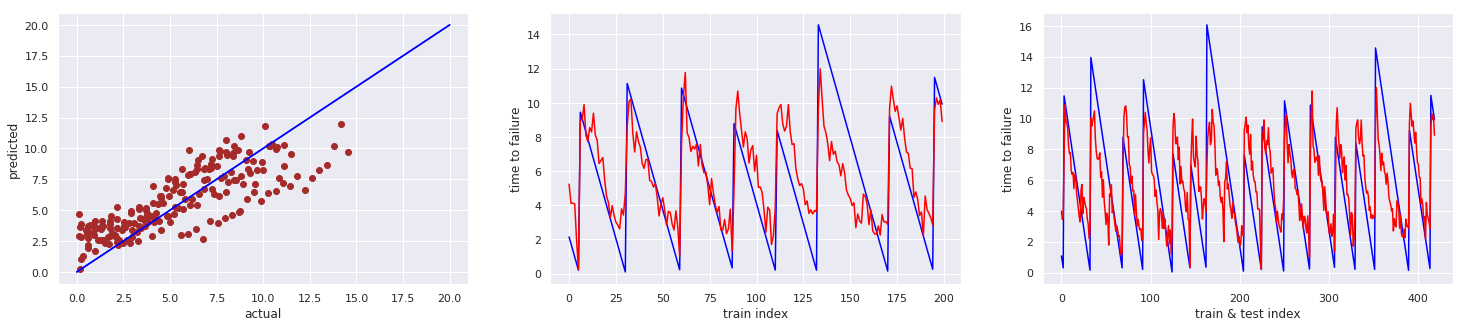

In [26]:
y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(1, 3, figsize=(25,5))
ax1, ax2, ax3 = axis
ax1.set_xlabel('actual')
ax1.set_ylabel('predicted')
ax2.set_xlabel('train index')
ax2.set_ylabel('time to failure')
ax3.set_xlabel('train & test index')
ax3.set_ylabel('time to failure')
ax1.scatter(y_test_nolog.values, y_predict, color='brown')
ax1.plot([(0, 0), (20, 20)], [(0, 0), (20, 20)], color='blue')
ax2.plot(y_test_nolog.values, color='blue')
ax2.plot(y_predict, color='red')
ax3.plot(y_nolog, color='blue')
ax3.plot(y_nolog_predict, color='red')

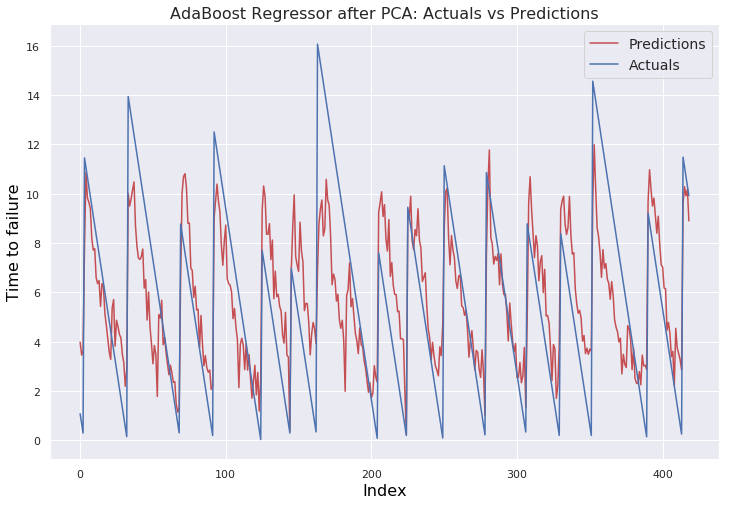

In [27]:
#plt.plot(y_nolog)
#plt.plot(y_nolog_predict)
#plt.title("Actuals vs Predictions")
fig = plt.subplots(figsize=(12, 8))
plt.title("AdaBoost Regressor after PCA: Actuals vs Predictions",fontsize=16)
plt.plot(y_nolog_predict, color='r')
plt.ylabel('Time to failure', color='black',fontsize=16)
plt.plot(y_nolog, color='b')
plt.xlabel('Index', color='black',fontsize=16)
plt.legend(['Predictions','Actuals'], loc='upper right',fontsize=14)
plt.grid(True)